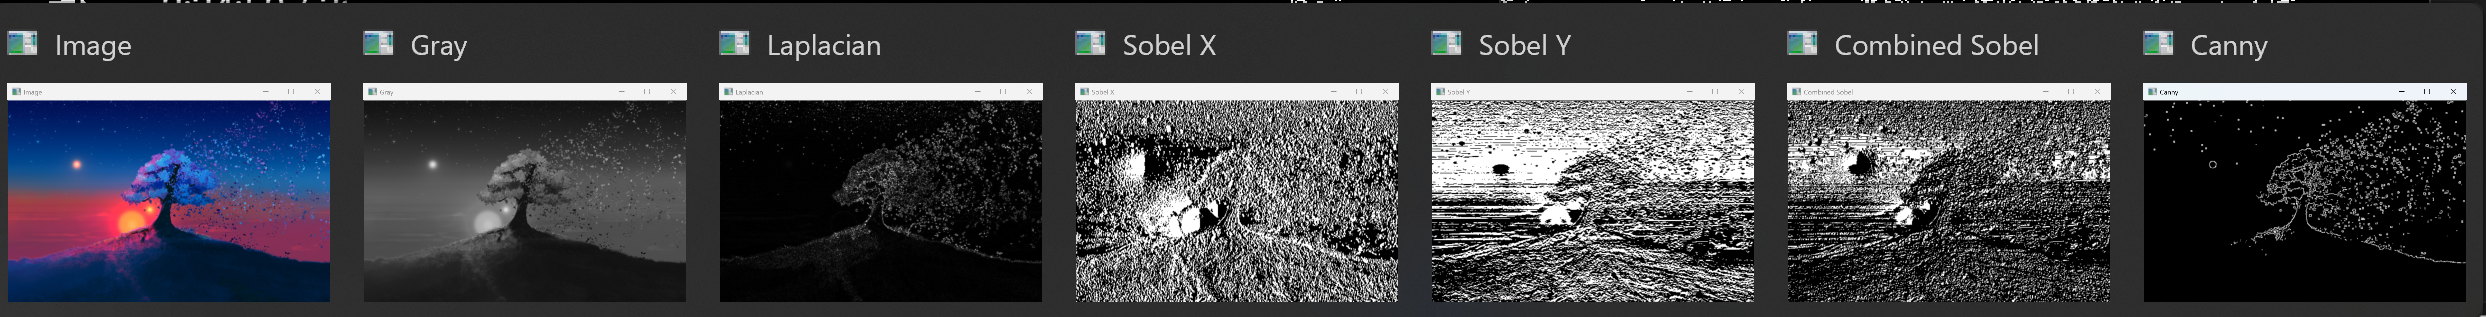
- 检测边缘的算子
  - laplacian算子
  - sobel算子
  - cannny算子
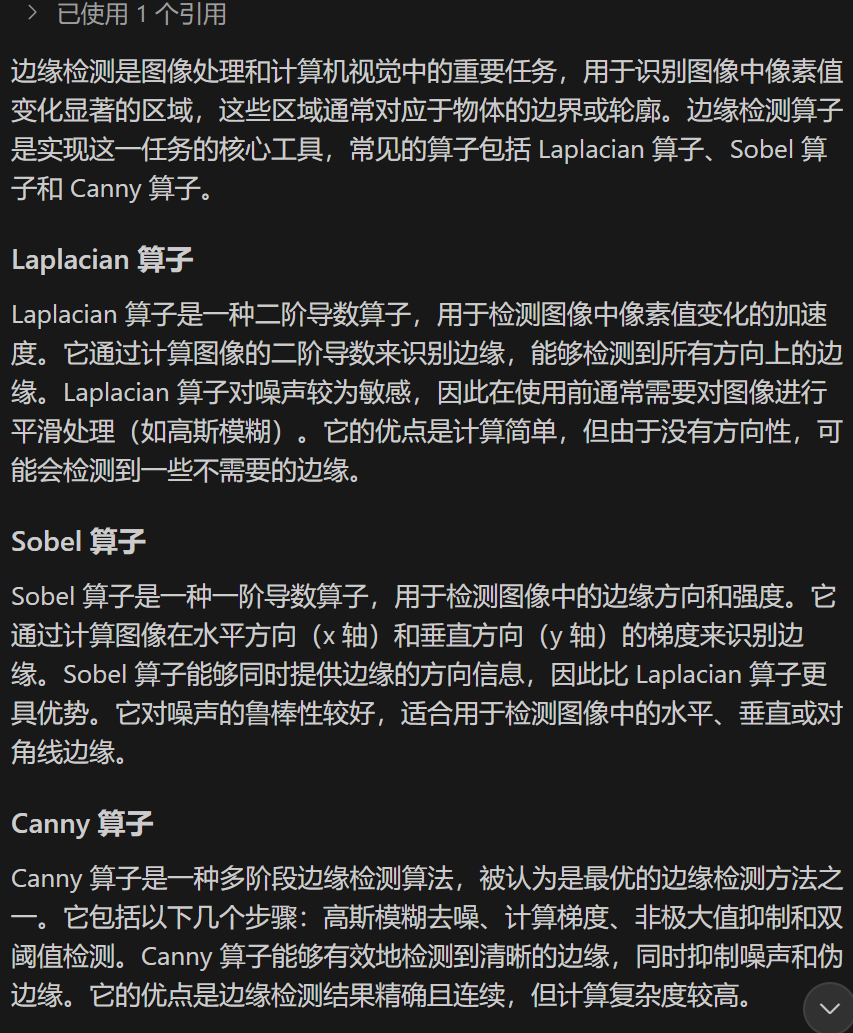

In [9]:
import cv2 as cv
import numpy as np

img = cv.imread("Photos/1.png")
img = cv.resize(img, None, None, fx=0.2, fy=0.2)
cv.imshow("Image", img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow("Gray", gray)

# laplacian 维度变换
# 拉普拉斯算子是一种二阶微分算子，用于检测图像中的边缘
# 由于图像是二维的，因此有两个方向的二阶导数，即x和y方向的二阶导数
# 由于拉普拉斯算子是二阶微分算子，因此对图像中的噪声非常敏感
# 为了减少噪声的影响，可以先对图像进行高斯滤波，然后再应用拉普拉斯算子
# 由于拉普拉斯算子是二阶微分算子，因此其输出值可能为负数
# （从白色到黑色，从黑色到白色）
# 为了显示这些负值，可以使用64位浮点数来存储输出，然后取绝对值
# 最后将结果转换为无符号8位整数，以便显示
lap = cv.Laplacian(gray, cv.CV_64F)
lap = np.uint8(np.absolute(lap))  # 由于图像从
cv.imshow("Laplacian", lap)


# sobel 算子
# sobel算子是一种离散的微分算子，用于计算图像的梯度
# sobel算子分为水平和垂直两种，分别用于计算水平和垂直方向的梯度
# 由于sobel算子是离散的微分算子，因此对图像中的噪声非常敏感
# 为了减少噪声的影响，可以先对图像进行高斯滤波，然后再应用sobel算子
# sobel算子的输出是一个浮点数，因此需要将其转换为无符号8位整数，以便显示
# sobel算子的输出是梯度的近似值，因此可能为负数

sobelx = cv.Sobel(gray, cv.CV_64F, 1, 0)
sobely = cv.Sobel(gray, cv.CV_64F, 0, 1)
combined_sobel = cv.bitwise_or(sobelx, sobely)

cv.imshow("Sobel X", sobelx)
cv.imshow("Sobel Y", sobely)
cv.imshow("Combined Sobel", combined_sobel)


# Canny 边缘检测
# Canny边缘检测是一种多步边缘检测算法

canny = cv.Canny(gray, 150, 170)
cv.imshow("Canny", canny)


cv.waitKey(0)
cv.destroyAllWindows()